In [21]:
### Importing the required libraries

import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords
import tqdm
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
from collections import Counter
from itertools import chain
import collections
import sys
sys.setrecursionlimit(1500)
import itertools
from matplotlib.ticker import FormatStrFormatter
import spacy
from spacy import displacy
nlp =spacy.load('en_core_web_sm')
from matplotlib.ticker import MaxNLocator
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from nltk.corpus import wordnet as wn
from stemming.porter2 import stem
#nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\desh669\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\desh669\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
### Providing the directory

In [22]:
cd C:\Users\desh669\Downloads

C:\Users\desh669\Downloads


In [23]:
data = pd.read_csv('Control_Inventory_Scoring_and_Comments.csv',encoding='cp1252')
data.head()

,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,What,Why,Additional Considerations 1,Additional Considerations 2,Additional Considerations 3,GOOD or BAD
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,Yes,No,Insufficient Information,Too long,NaN,B
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,Yes,No,Too Long,"Unclear Control frequency. i.e. ""As needed"", ""...",May be broken down into three controls,B
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,Yes,Yes,NaN,NaN,NaN,G


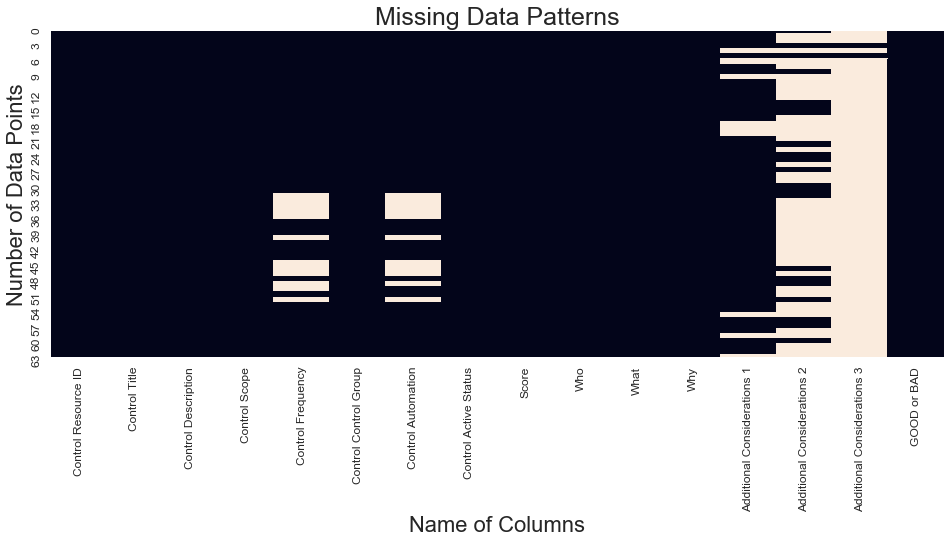

In [17]:
fig = plt.figure(figsize=(16,6))
sns.set(font_scale=0.9)
plt.title('Missing Data Patterns', fontsize=25)

ax = sns.heatmap(data.isnull(), cbar=False)
ax.set(xlabel='Name of Columns', ylabel='Number of Data Points')
plt.ylabel('Number of Data Points',fontsize =22)
plt.xlabel('Name of Columns',fontsize=22)
ax.tick_params(axis='both', which='major', labelsize=12)
#plt.savefig('Missing_Value_Patterns.png', bbox_inches="tight")

plt.show()

In [55]:
data['Score'].value_counts()

7     17
3     16
2     16
8      6
10     5
4      3
5      2
9      1
Name: Score, dtype: int64

In [244]:
data['GOOD or BAD'].value_counts()

B    39
G    27
Name: GOOD or BAD, dtype: int64

In [24]:
### Now we will try to perform some descriptive analytics.
### Let us make a new variable for the number of words in every control description 
data['len'] = [len(i.split()) for i in data['Control Description']]
data.head()

,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,What,Why,Additional Considerations 1,Additional Considerations 2,Additional Considerations 3,GOOD or BAD,len
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,Yes,No,Insufficient Information,Too long,NaN,B,46
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,40
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,43
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,Yes,No,Too Long,"Unclear Control frequency. i.e. ""As needed"", ""...",May be broken down into three controls,B,108
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,Yes,Yes,NaN,NaN,NaN,G,37


Text(0, 0.5, 'Length of Descriptions')

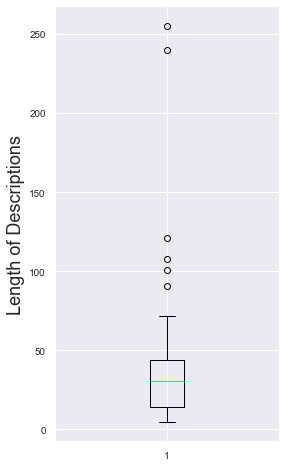

In [22]:
## let us see how the distribution looks like (according to the length of the sentences)
fig = plt.figure(figsize=(4,8))
plt.boxplot(data['len'])
plt.ylabel('Length of Descriptions',fontsize = 18)

#### Here we can see that the median for the length of the description is around 30 with few exceptions with
####(possible outliers)

<Figure size 288x576 with 0 Axes>

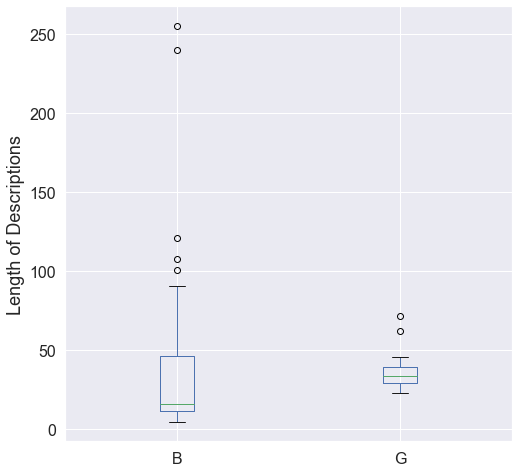

In [33]:
### let us try to see the distribution according to the category (good or bad)
fig = plt.figure(figsize=(4,8))
data.assign(index=data.groupby('GOOD or BAD').cumcount()).pivot('index','GOOD or BAD','len').plot(kind='box',figsize=(8,8),fontsize=16)
plt.ylabel('Length of Descriptions',fontsize = 18)
plt.savefig('Boxplots_G&B.png')
plt.show()

In [35]:
data[data['GOOD or BAD'] == 'G']['len'].median()

34.0

In [57]:
### let us remove the stopwords so that we can highlight the important keywords in every description

len(set(stopwords.words('english')))

## These are the number of stopwords we have available

179

In [25]:
li_ = []
for s in tqdm.tqdm(data['Control Description'],total = data.shape[0]):
    a = 0
    a = [word for word in s.split() if word.lower() not in stopwords.words('english')]
    #print(a)
    li_.append(a)
data['filtered_descriptions'] = li_
data.head()

#### Please note that here we have created a new column - Filtered Descriptions which is without english stopwords

100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:01<00:00, 57.40it/s]


,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,What,Why,Additional Considerations 1,Additional Considerations 2,Additional Considerations 3,GOOD or BAD,len,filtered_descriptions
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,Yes,No,Insufficient Information,Too long,NaN,B,46,"[Management, reviews, local, product, developm..."
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,40,"[monthly, basis, Manager, Compliance, review, ..."
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,43,"[Compliance, Department, assesses, reviews, cu..."
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,Yes,No,Too Long,"Unclear Control frequency. i.e. ""As needed"", ""...",May be broken down into three controls,B,108,"[Compliance, Officer, communicates, AML, notif..."
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,Yes,Yes,NaN,NaN,NaN,G,37,"[Compliance, department, monitors, suspicious,..."


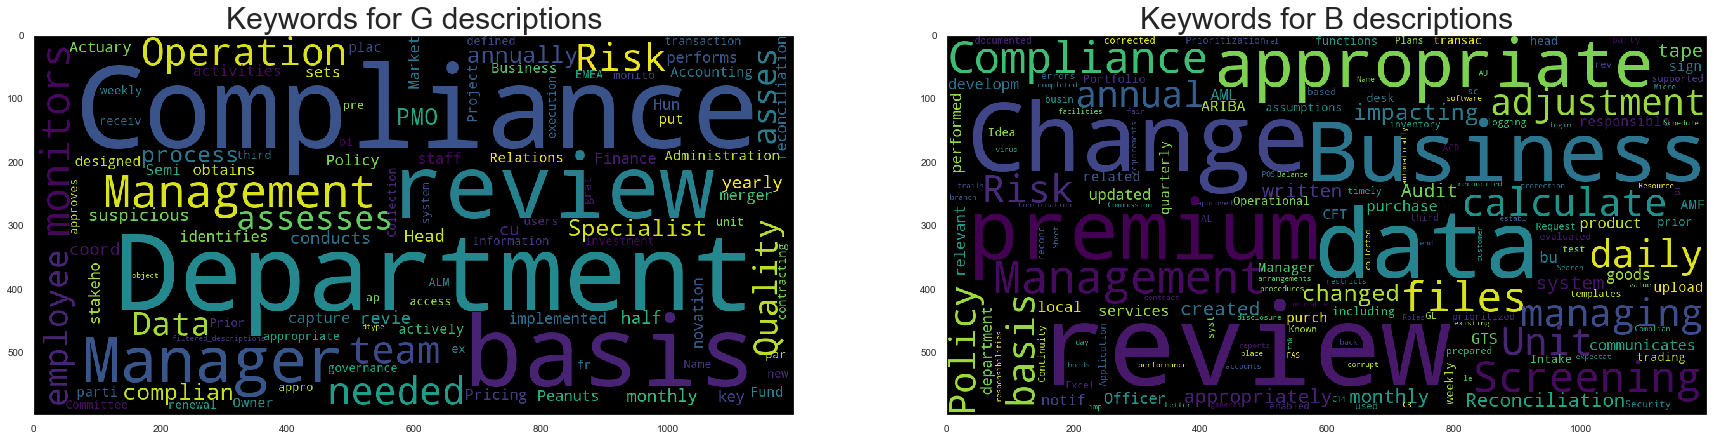

In [44]:
#### Now since we have removed the stopwords from the control descriptions, we will try to make the word clouds
#### for separate description qualities (Good and bad) in order to highlight the important keywords.
#stopwords = set(stopwords.words("english"))
plt.figure(figsize=(30,18))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(1,2,j)
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=60,
                          scale=3,random_state=1).generate(str(data.loc[data['GOOD or BAD'] == i]['filtered_descriptions']))
    
    plt.title(f'Keywords for {i} descriptions',fontsize = 30)
    plt.imshow(wordcloud)
    plt.grid()
    plt.savefig('Word_Clouds_B&G.png')
    plt.show
    
    
### Few important words which can be seen from the cloud of Good descriptions - Designed, Assesses,Needed etc (action verbs)

In [26]:
##### This function is used to flatten the nested lists It is a recursive function since the same function is called once inside the function.
def flat(l):
    ret = []
    for i in l:
        if isinstance(i, list) or isinstance(i, tuple):
            ret.extend(flat(i))
        else:
            ret.append(i)
    return ret

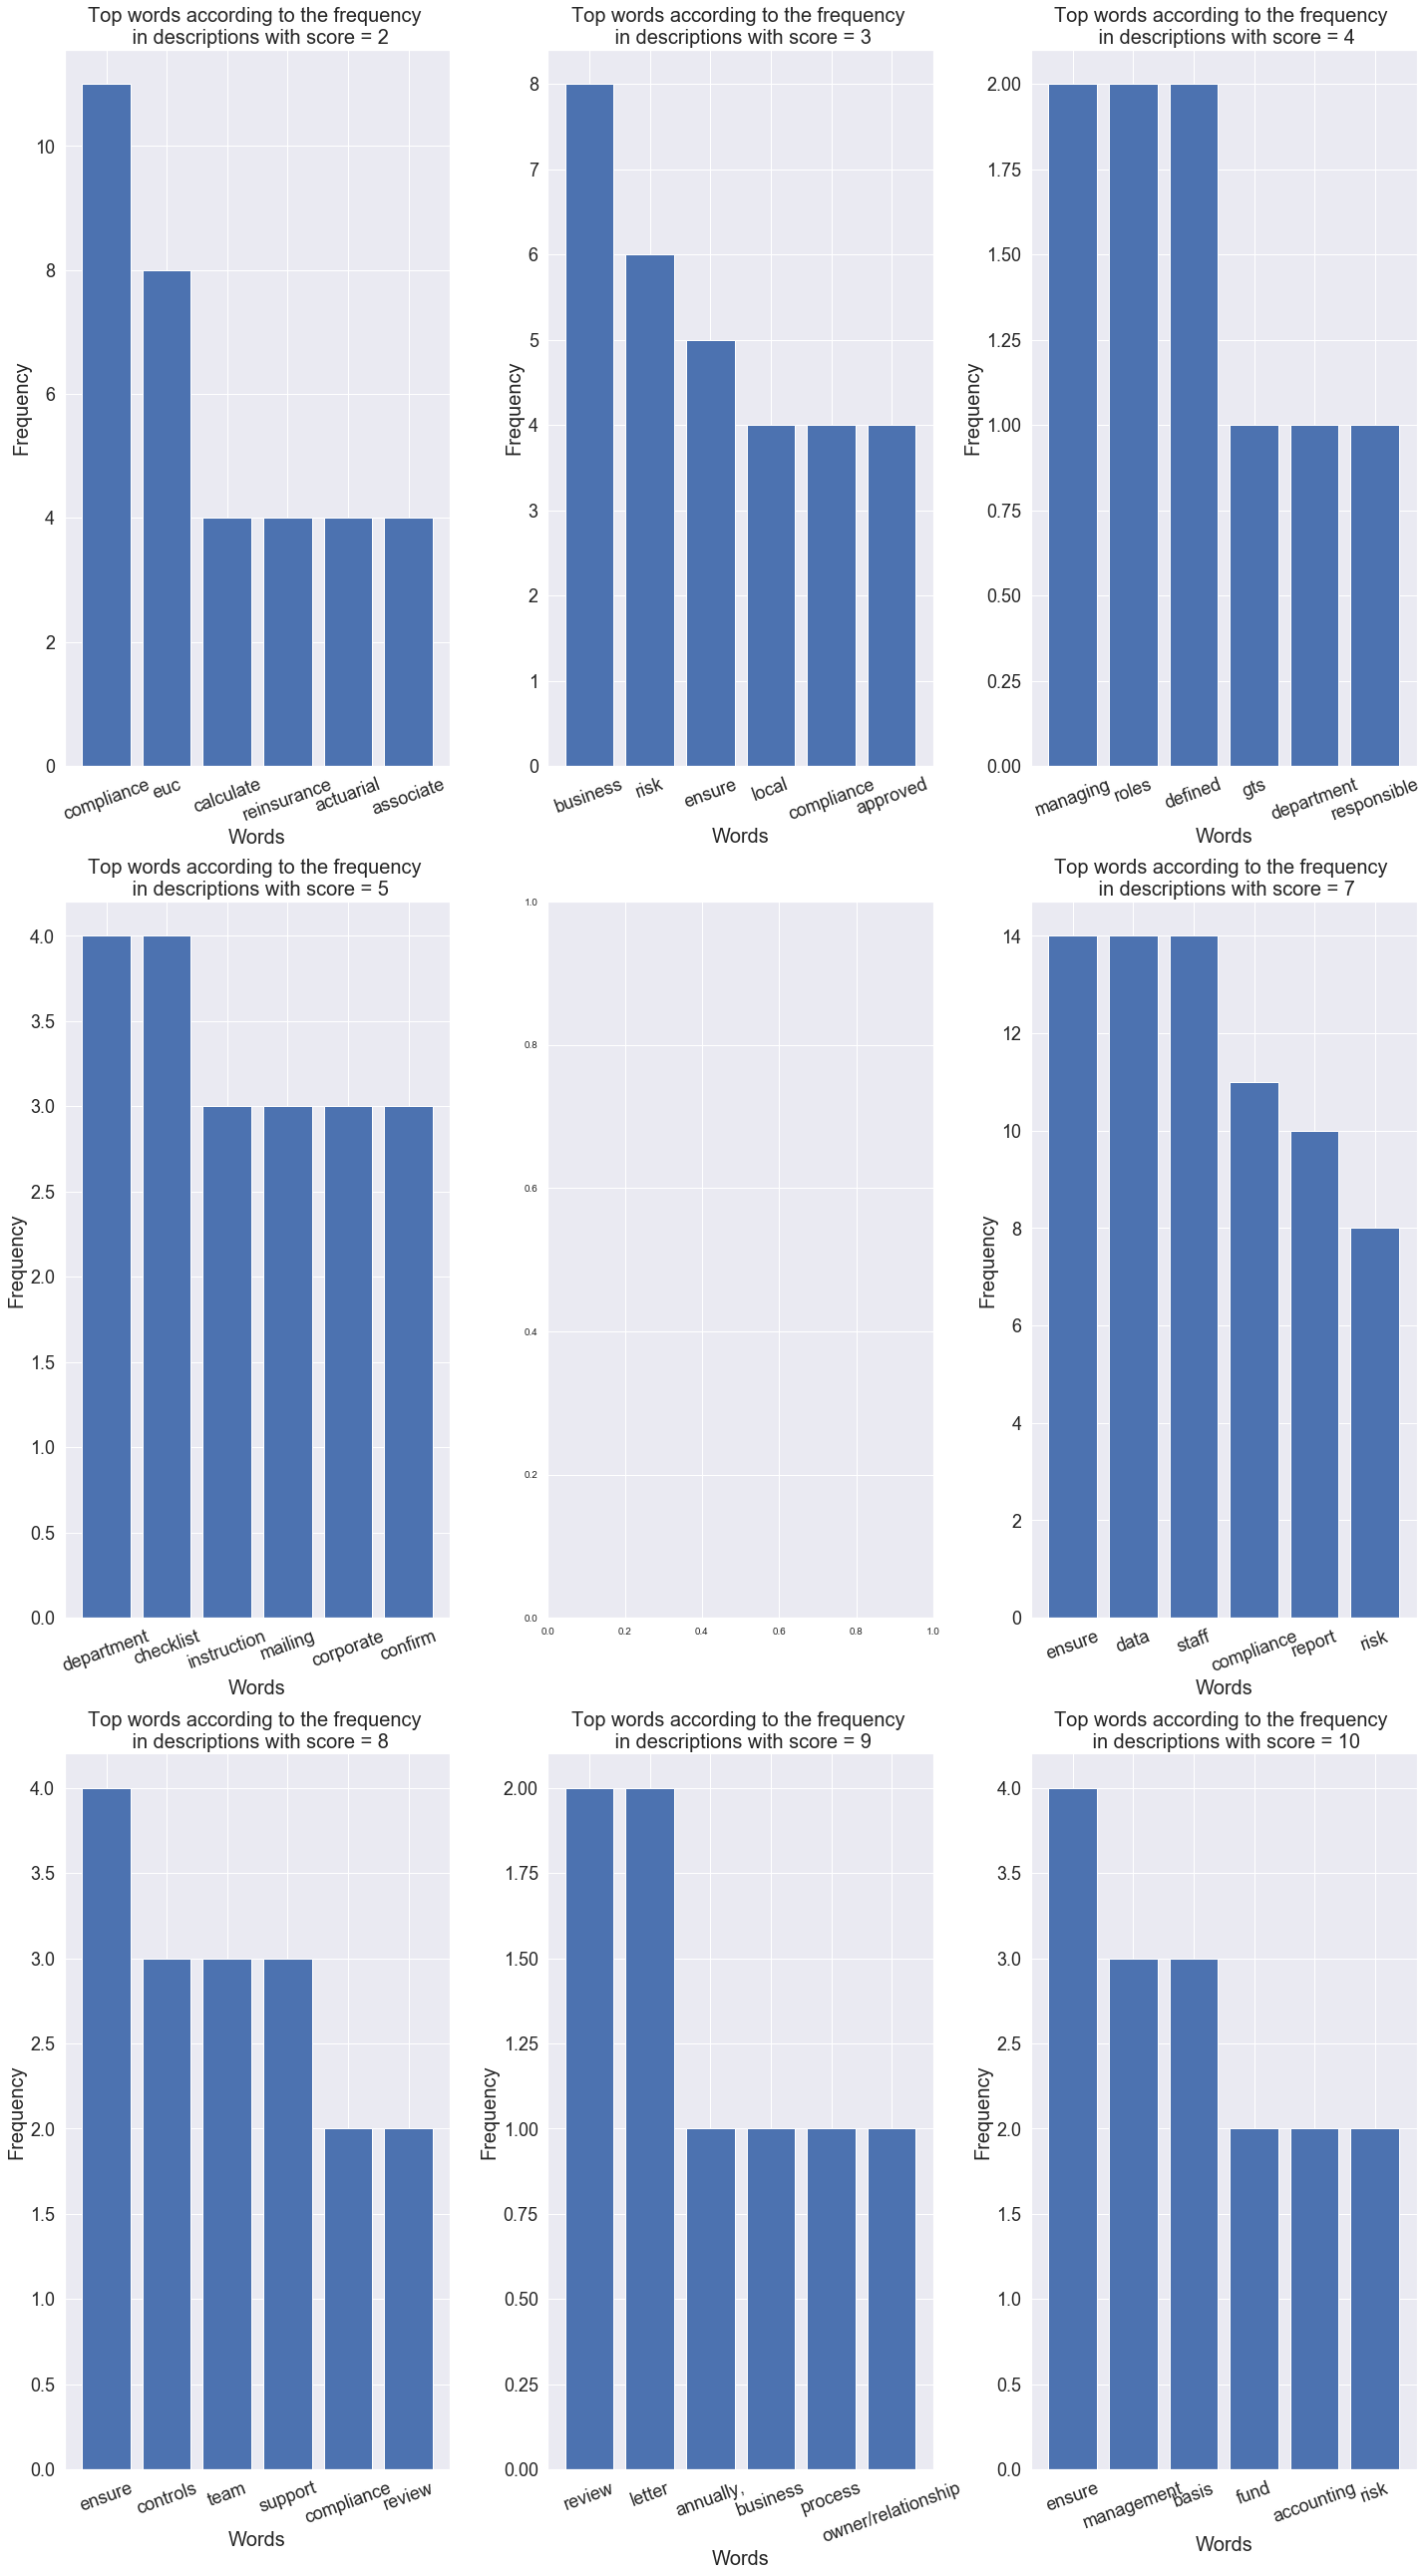

In [367]:
### Now we will try to find out the number of occurences of words for every score (2 to 10)
fig = plt.figure(figsize=(20,36))

#fig.yaxis.set_major_locator(MaxNLocator(integer=True))

for i,j in zip(range(2,11),range(1,10)):
    plt.subplot(int(str(33)+str(j)))
    
    ##Below list stores data for every score and then it changes as the iteration continues
    li_ = []
    li_.append(data[data['Score'] == i]['filtered_descriptions'].values.tolist())
    
    ##Below list stores the words from previous list after flattening them
    g = []
    g = flat(li_)
    g = [l.lower() for l in g]
    
    ###Below function calculates the freq of every word
    counts = 0
    counts = Counter(g)
    
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
    
    ### This function selects the top 6 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 6))
    
    if top_counts:
        
        plt.bar(*zip(*top_counts.items()))
        plt.xticks(fontsize = 18,rotation = 20)
        plt.xlabel('Words',fontsize = 20)
        plt.ylabel('Frequency',fontsize = 20)
        plt.yticks(fontsize = 18)
        plt.title(f'Top words according to the frequency \n in descriptions with score = {i}',fontsize=20)
        fig.tight_layout()

        plt.grid
        plt.show
        
#### There are not any descriptions with score = 6

Now we will try to visualize the dependencies in the sentences



ADJ: adjective, e.g. big, old, green, incomprehensible, first
ADP: adposition, e.g. in, to, during
ADV: adverb, e.g. very, tomorrow, down, where, there
AUX: auxiliary, e.g. is, has (done), will (do), should (do)
CONJ: conjunction, e.g. and, or, but
CCONJ: coordinating conjunction, e.g. and, or, but
DET: determiner, e.g. a, an, the
INTJ: interjection, e.g. psst, ouch, bravo, hello
NOUN: noun, e.g. girl, cat, tree, air, beauty
NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
PART: particle, e.g. ’s, not,
PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
PUNCT: punctuation, e.g. ., (, ), ?
SCONJ: subordinating conjunction, e.g. if, while, that
SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 😝
VERB: verb, e.g. run, runs, running, eat, ate, eating
X: other, e.g. sfpksdpsxmsa
SPACE: space, e.g.

In [92]:
### Let us take one of the description as an example
doc = data['Control Description'].values[24]
print(doc)

### Put this text into the model
doc_2 = nlp(doc)

Idea Intake and Prioritization prepared by business owner approved by CEO



In [93]:
#### Now we will print the tokens along with their tags 
[print(str(token.text),str(token.lemma_),str(token.pos_),str(token.dep_)) for token in doc_2]
displacy.render(doc_2, style="dep",jupyter = True,options={'distance':90})

Idea Idea PROPN compound
Intake Intake PROPN ROOT
and and CCONJ cc
Prioritization Prioritization PROPN conj
prepared prepare VERB acl
by by ADP agent
business business NOUN compound
owner owner NOUN pobj
approved approve VERB acl
by by ADP agent
CEO CEO PROPN pobj

 
 SPACE 


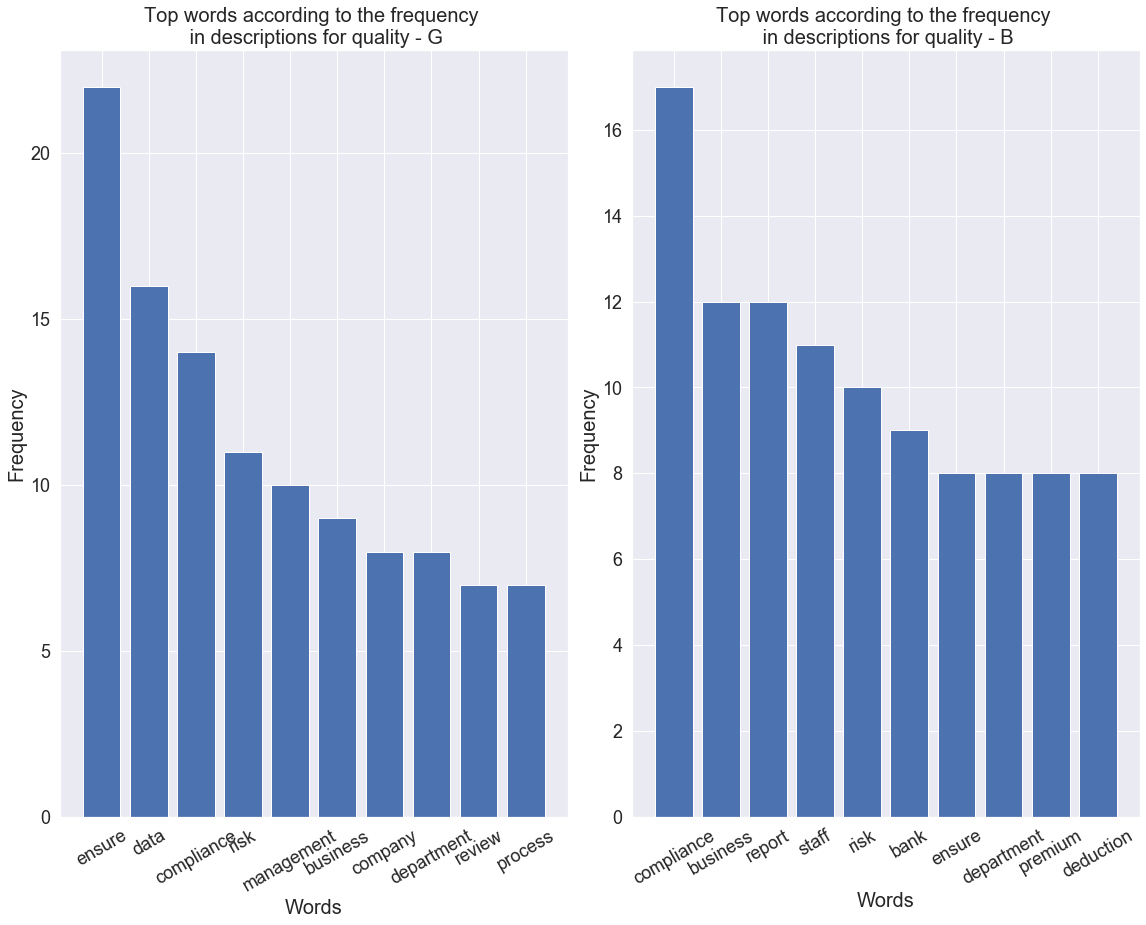

In [50]:
#### Top words according to the category of the description - Good and Bad
### Now we will try to find out the number of occurences of words for every score (2 to 10)
fig = plt.figure(figsize=(24,36))

#fig.yaxis.set_major_locator(MaxNLocator(integer=True))

for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    
    ##Below list stores data for every score and then it changes as the iteration continues
    li_ = []
    li_.append(data[data['GOOD or BAD'] == i]['filtered_descriptions'].values.tolist())
    
    ##Below list stores the words from previous list after flattening them
    g = []
    g = flat(li_)
    g = [l.lower() for l in g]
    
    ###Below function calculates the freq of every word
    counts = 0
    counts = Counter(g)
    
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
    
    ### This function selects the top 6 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 10))
    
    if top_counts:
        
        plt.bar(*zip(*top_counts.items()))
        plt.xticks(fontsize = 18,rotation = 30)
        plt.xlabel('Words',fontsize = 20)
        plt.ylabel('Frequency',fontsize = 20)
        plt.yticks(fontsize = 18)
        plt.title(f'Top words according to the frequency \n in descriptions for quality - {i}',fontsize=20)
        fig.tight_layout()
        

        plt.grid
        plt.savefig('Top_Words_According_to_Quality.png')
        plt.show
        
#### There are not any descriptions with score = 6

In [99]:
### This is another way of tagging the words according to their functionality

# words = ['amazing', 'interesting', 'love', 'great', 'nice']
# for w in words:
#     print(w)
#     print(type(w))
#     tmp = wn.synsets(w)[0].pos()
#     print(w, ":", tmp)

In [28]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# Week 2

In [27]:
### Now we will find verbs from every filtered description and store them in a new column called - Just_Verbs
new_list = []
for d in tqdm.tqdm(data['filtered_descriptions'],total = data.shape[0]):
    k = []
    k = nltk.pos_tag(d)
    values = []
    values = set(map(lambda x:x[1], k))
    li_ = list(set(flat([[y[0] for y in k if y[1]=='VB' or y[1]=='VBZ'] for y in values])))
    new_list.append([stem(word) for word in li_])
    #new_list.append(list(set(flat([[y[0] for y in k if y[1]=='VB' or y[1]=='VBZ'] for y in values]))))
    
#print(new_list)
#print(len(new_list))

data['Just_Verbs'] = new_list
data.head()

100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 215.32it/s]


,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,What,Why,Additional Considerations 1,Additional Considerations 2,Additional Considerations 3,GOOD or BAD,len,filtered_descriptions,Just_Verbs
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,Yes,No,Insufficient Information,Too long,NaN,B,46,"[Management, reviews, local, product, developm...","[ensur, review]"
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,40,"[monthly, basis, Manager, Compliance, review, ...","[ensur, identifi, pattern, facilit]"
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,43,"[Compliance, Department, assesses, reviews, cu...","[ensur, assess]"
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,Yes,No,Too Long,"Unclear Control frequency. i.e. ""As needed"", ""...",May be broken down into three controls,B,108,"[Compliance, Officer, communicates, AML, notif...","[ensur, communic, review]"
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,Yes,Yes,NaN,NaN,NaN,G,37,"[Compliance, department, monitors, suspicious,...",[ensur]


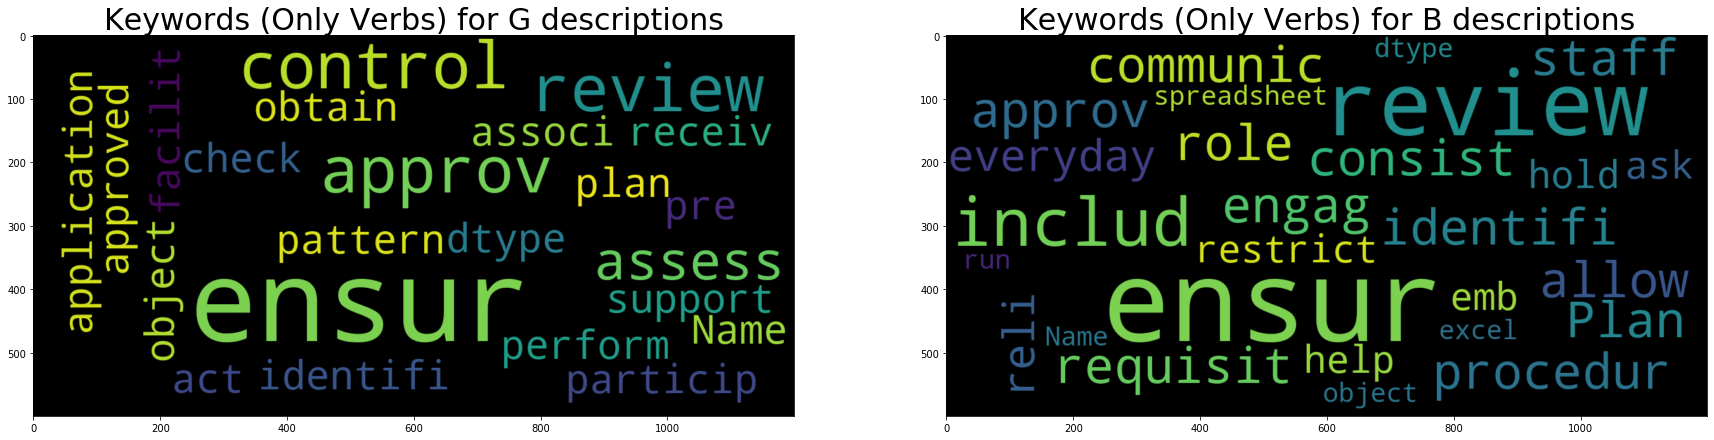

In [27]:
### Now since we have got all the verbs in a new column we will try to visualize them according to Good and Bad Descriptions

#stopwords = set(stopwords.words("english"))
new_words =['Just_verbs']
new_stopwords=stopwords.union(new_words)
#print(new_stopwords)

plt.figure(figsize=(30,18))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(1,2,j)
    wordcloud = WordCloud(background_color='Black',stopwords=new_stopwords,max_words=200,max_font_size=60,min_font_size=4,
                          scale=3,random_state=1).generate(str(data.loc[data['GOOD or BAD'] == i]['Just_Verbs']))
    
    plt.title(f'Keywords (Only Verbs) for {i} descriptions',fontsize = 30)
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.grid
    #plt.savefig('Word_Clouds_B&G.png')
    plt.show
    

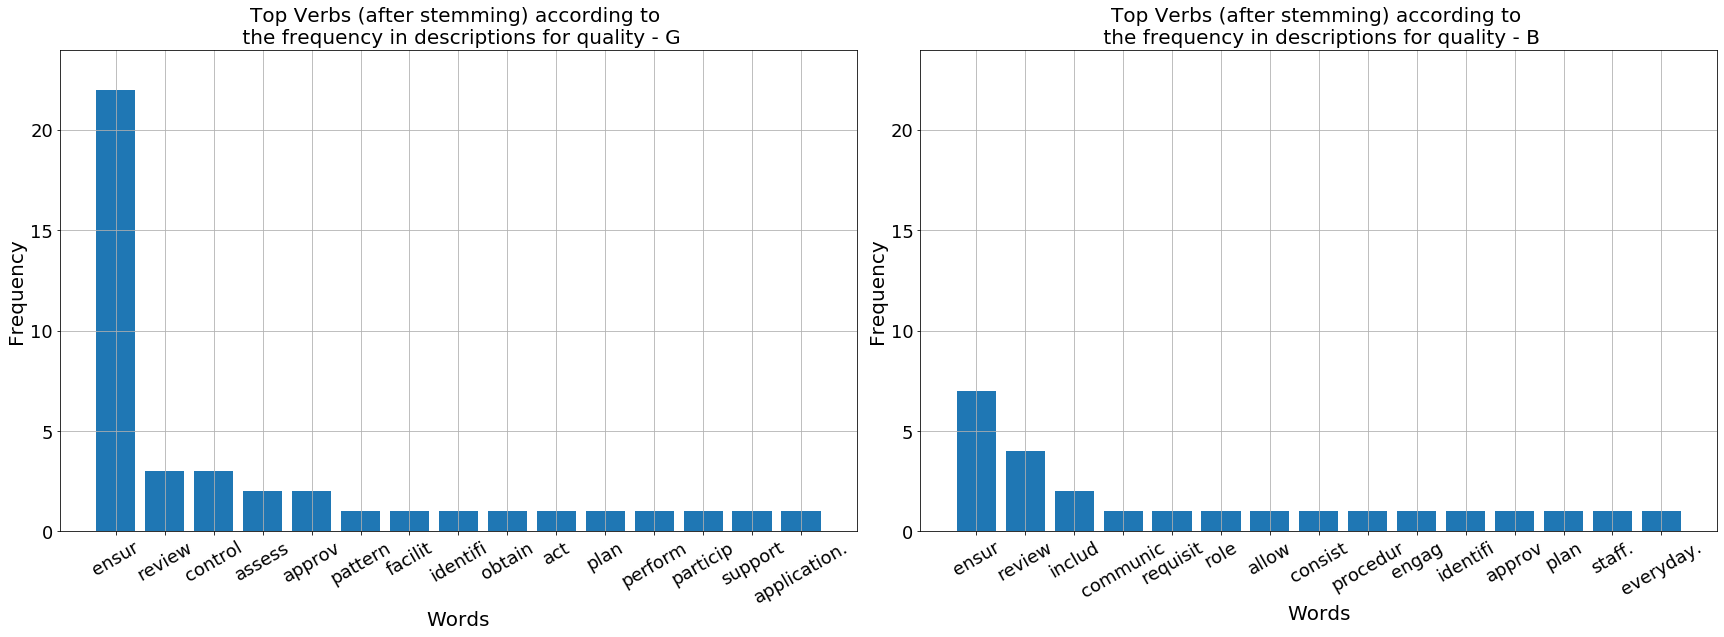

In [122]:
#### Top verbs according to the category of the description - Good and Bad

fig = plt.figure(figsize=(36,24))

#fig.yaxis.set_major_locator(MaxNLocator(integer=True))

for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    
    ##Below list stores data for every score and then it changes as the iteration continues
    li_ = []
    li_.append(data[data['GOOD or BAD'] == i]['Just_Verbs'].values.tolist())
    
    ##Below list stores the words from previous list after flattening them
    g = []
    g = flat(li_)
    g = [l.lower() for l in g]
    
    ###Below function calculates the freq of every word
    counts = 0
    counts = Counter(g)
    
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
    
    ### This function selects the top 6 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 15))
    
    if top_counts:
        
        plt.bar(*zip(*top_counts.items()))
        plt.xticks(fontsize = 18,rotation = 30)
        plt.xlabel('Words',fontsize = 20)
        plt.ylabel('Frequency',fontsize = 20)
        plt.yticks(fontsize = 18)
        plt.ylim(int(0),int(24))
        plt.title(f'Top Verbs (after stemming) according to \n the frequency in descriptions for quality - {i}',fontsize=20)
        fig.tight_layout()
        

        plt.grid()
        #plt.savefig('Top_Words_According_to_Quality.png')
        plt.show
        


In [203]:
# ### This is used to check if a pair of words is present in a particular sentence
# for index,row in data[data['GOOD or BAD']=='G'].iterrows():
#     if 'to ensure' in row[2]:
#         print(row[8])

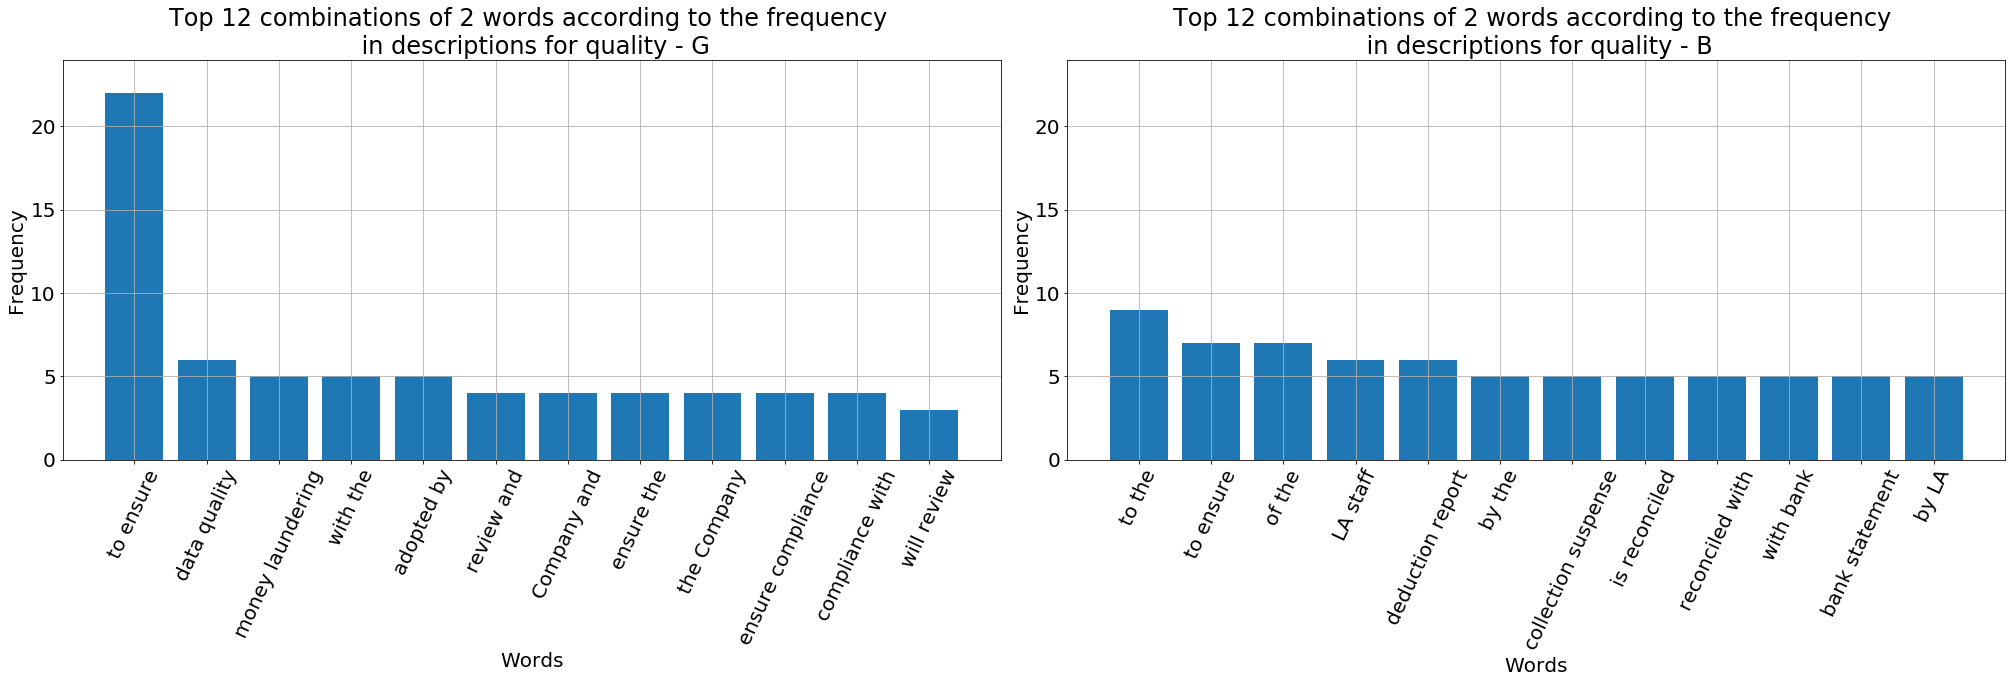

In [119]:
fig = plt.figure(figsize=(42,24))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    a = []
    for x in data[data['GOOD or BAD'] == i]['Control Description']:
        x = re.sub('[(){}<>.,]','',x)
        a.extend(list(ngrams(nltk.word_tokenize(x),2)))
        
    a = [' '.join(i) for i in a] 
    #print(a)
    counts = 0
    counts = Counter(a)
    
    #print(counts)
        
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
        
    ### This function selects the top 6 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 12))
        
    #print(top_counts.items())
    plt.bar(*zip(*top_counts.items()))
    plt.xticks(fontsize = 20,rotation = 65)
    plt.xlabel('Words',fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ylim(int(0),int(24))
    plt.title(f'Top 12 combinations of 2 words according to the frequency \n in descriptions for quality - {i}',fontsize=24)
    fig.tight_layout()
    plt.grid()
    #plt.savefig('Top_Words_According_to_Quality.png')
    plt.show

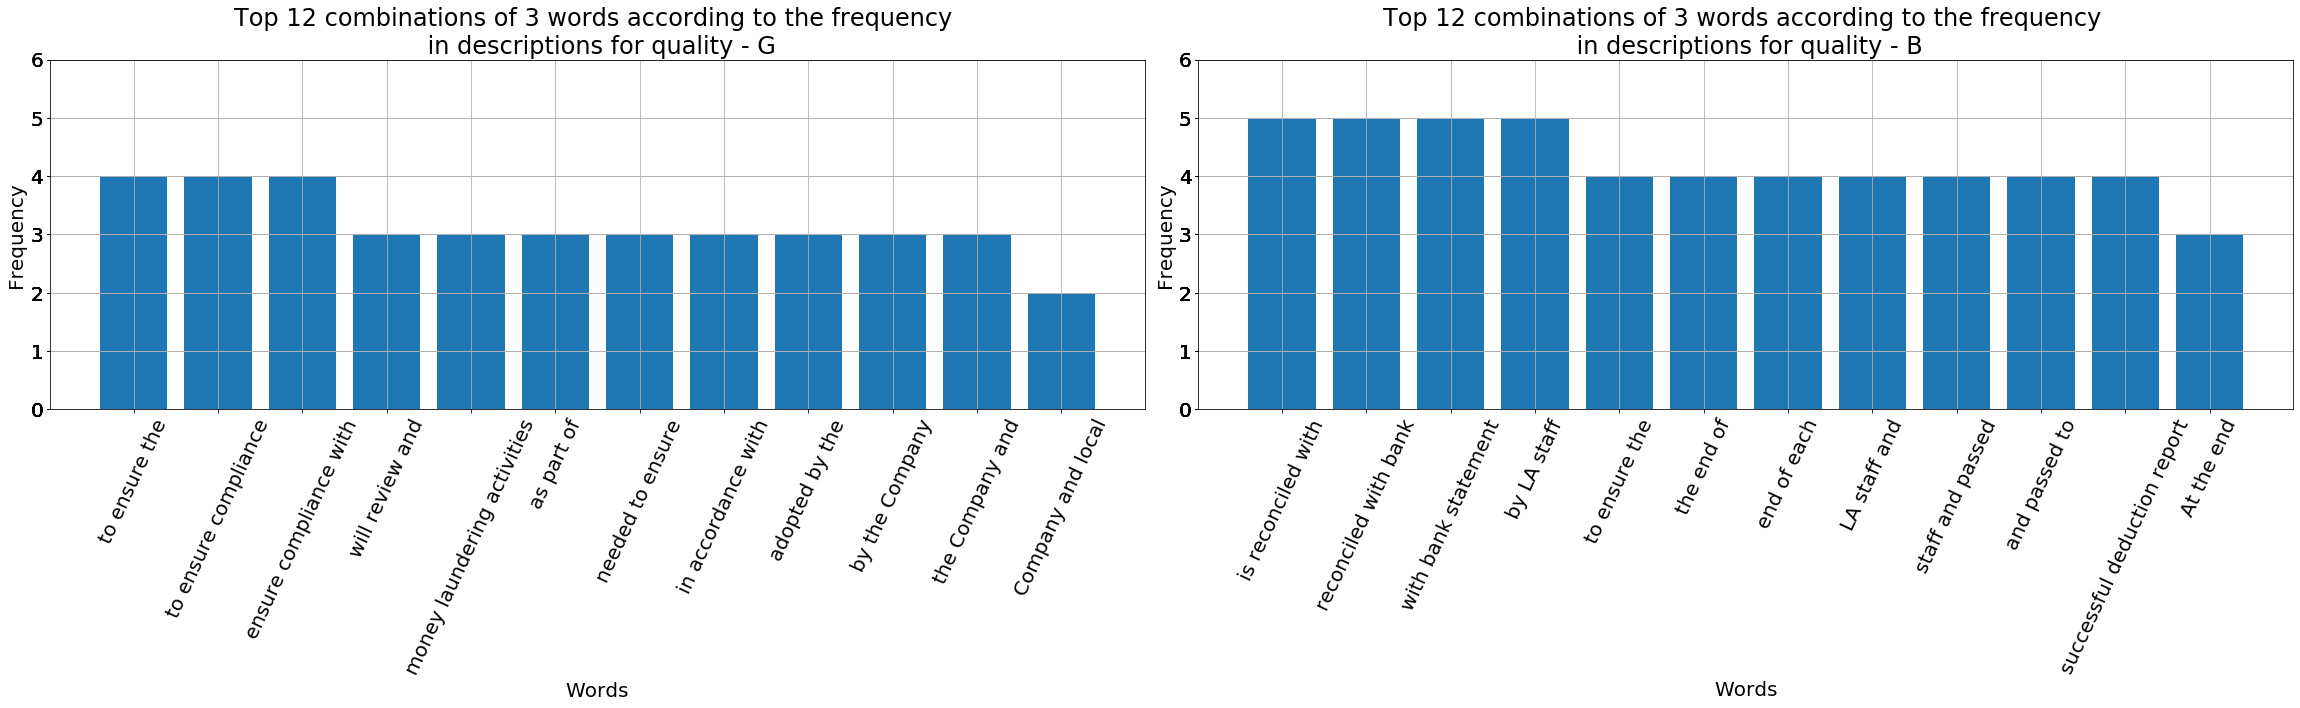

In [129]:
fig = plt.figure(figsize=(48,24))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    a = []
    for x in data[data['GOOD or BAD'] == i]['Control Description']:
        x = re.sub('[(){}<>.,]','',x)
        a.extend(list(ngrams(nltk.word_tokenize(x),3)))
        
    a = [' '.join(i) for i in a] 
    #print(a)
    counts = 0
    counts = Counter(a)
    
    #print(counts)
        
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
        
    ### This function selects the top 12 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 12))
        
    #print(top_counts.items())
    plt.bar(*zip(*top_counts.items()))
    plt.xticks(fontsize = 20,rotation = 65)
    plt.xlabel('Words',fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    locs, labels = plt.yticks()
    for each in locs:
        yint.append(int(each))
    plt.yticks(yint,fontsize=20)
    #plt.yticks(fontsize = 20)
    plt.ylim(0,6)
    plt.title(f'Top 12 combinations of 3 words according to the frequency \n in descriptions for quality - {i}',fontsize=24)
    fig.tight_layout()
    plt.grid()
    #plt.savefig('Top_Words_According_to_Quality.png')
    plt.show

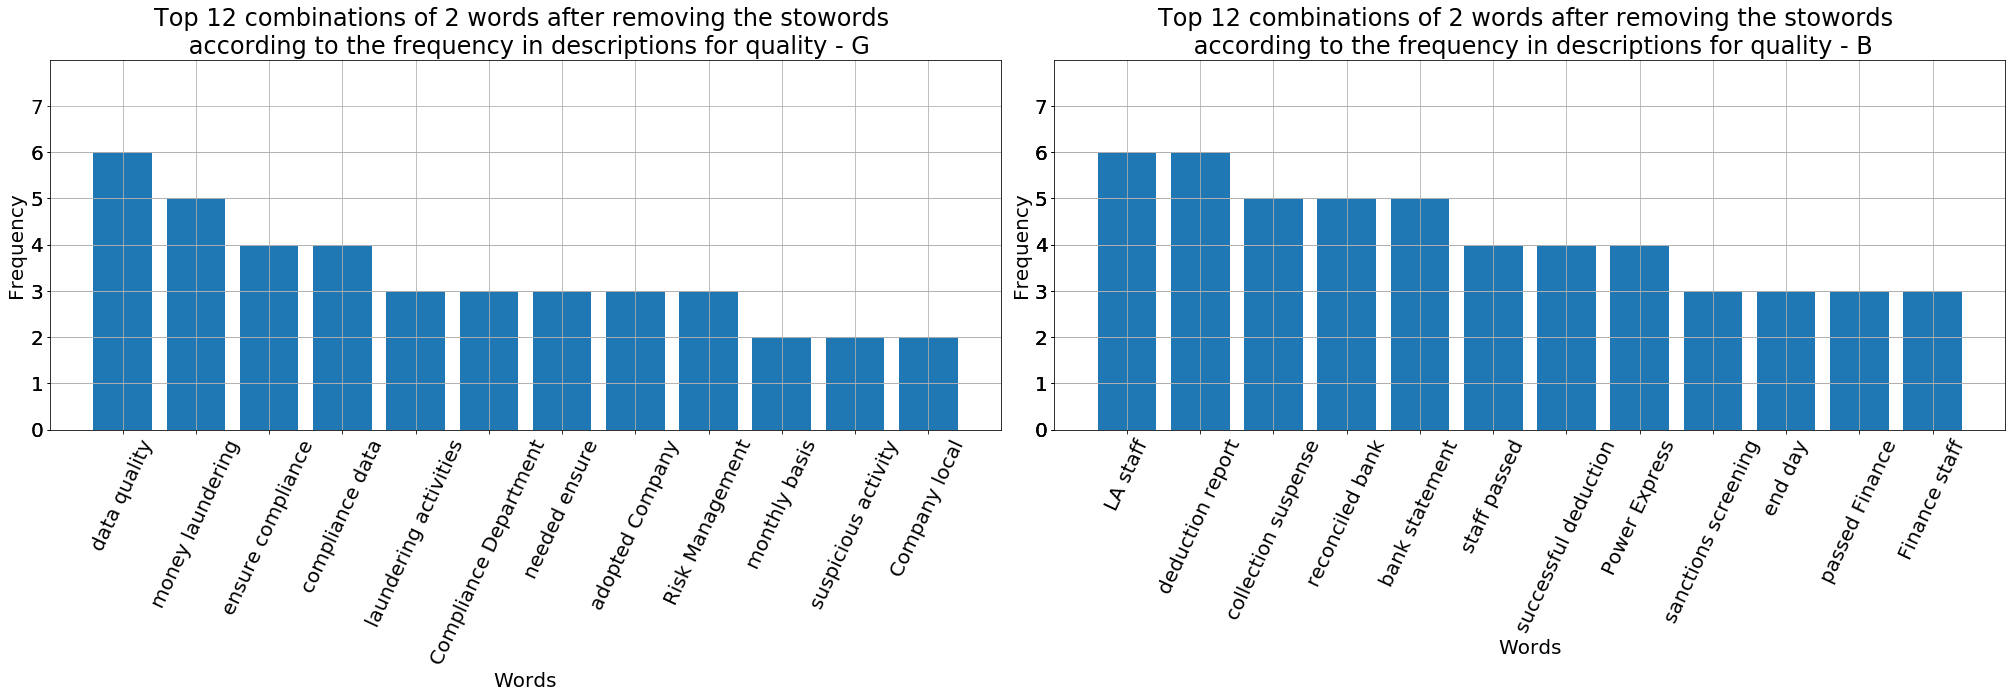

In [128]:
#### Now we will try to plot the same graph but this time we will remove the stop words from our descriptions.
fig = plt.figure(figsize=(42,24))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    a = []
    for x in data[data['GOOD or BAD'] == i]['filtered_descriptions']:
        #print(x)
        x = ' '.join(x)
        x = str(x)
        #print(x)
        x = re.sub('[(){}<>.,]','',x)
        a.extend(list(ngrams(nltk.word_tokenize(x),2)))
    #print(a)
        
    a = [' '.join(i) for i in a] 
    #print(a)
    counts = 0
    counts = Counter(a)
    
    #print(counts)
        
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
        
    ### This function selects the top 12 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 12))
        
    #print(top_counts.items())
    plt.bar(*zip(*top_counts.items()))
    plt.xticks(fontsize = 20,rotation = 65)
    plt.xlabel('Words',fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    locs, labels = plt.yticks()
    for each in locs:
        yint.append(int(each))
    plt.yticks(yint,fontsize=20)
    #plt.yticks(fontsize = 20)
    plt.ylim(0,8)
    plt.title(f'Top 12 combinations of 2 words after removing the stowords \n according to the frequency in descriptions for quality - {i}',fontsize=24)
    fig.tight_layout()
    plt.grid()
    #plt.savefig('Top_Words_According_to_Quality.png')
    plt.show

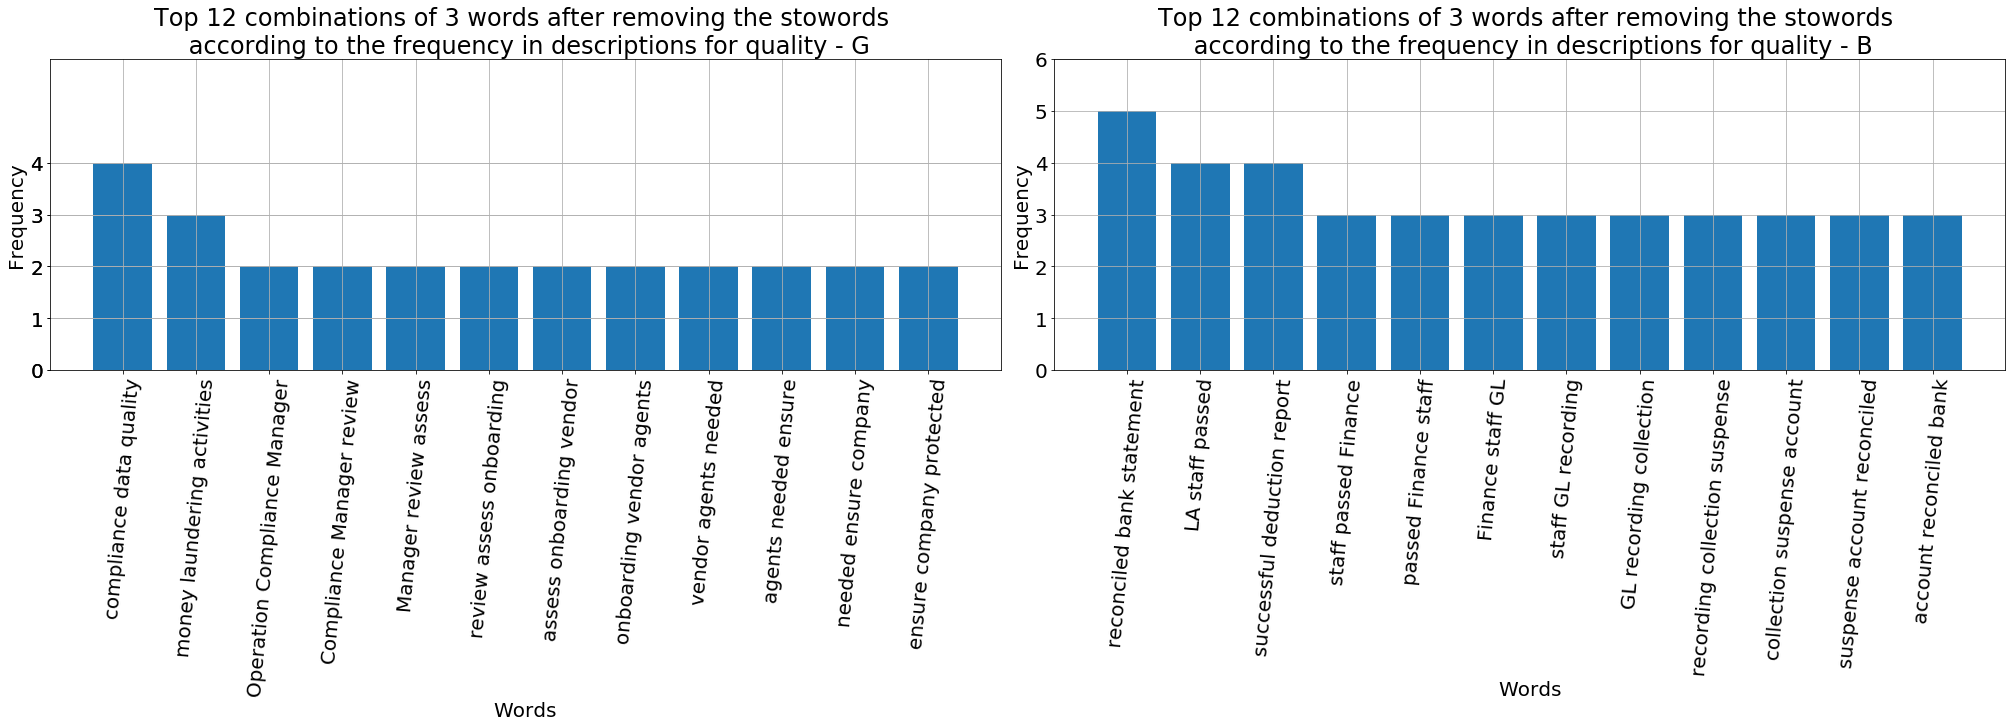

In [127]:
#### Now we will try to plot the same graph but this time we will remove the stop words from our descriptions.
fig = plt.figure(figsize=(42,24))
for i,j in zip(['G','B'],range(1,3)):
    plt.subplot(int(str(33)+str(j)))
    a = []
    for x in data[data['GOOD or BAD'] == i]['filtered_descriptions']:
        #print(x)
        x = ' '.join(x)
        x = str(x)
        #print(x)
        x = re.sub('[(){}<>.,]','',x)
        a.extend(list(ngrams(nltk.word_tokenize(x),3)))
    #print(a)
        
    a = [' '.join(i) for i in a] 
    #print(a)
    counts = 0
    counts = Counter(a)
    
    #print(counts)
        
    ### Below line sorts the words and frequencies according to the frequency (descending)
    sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1],reverse=True)}
        
    ### This function selects the top 12 words according to the frequency
    top_counts = 0
    top_counts = dict(itertools.islice(sorted_counts.items(), 12))
        
    #print(top_counts.items())
    plt.bar(*zip(*top_counts.items()))
    plt.xticks(fontsize = 20,rotation = 85)
    plt.xlabel('Words',fontsize = 20)
    plt.ylabel('Frequency',fontsize = 20)
    yint = []
    locs, labels = plt.yticks()
    for each in locs:
        yint.append(int(each))
    plt.yticks(yint,fontsize=20)
    #plt.yticks(fontsize = 20)
    plt.ylim(0,6)
    plt.title(f'Top 12 combinations of 3 words after removing the stowords \n according to the frequency in descriptions for quality - {i}',fontsize=24)
    fig.tight_layout()
    plt.grid()
    #plt.savefig('Top_Words_According_to_Quality.png')
    plt.show

In [33]:
#### Now we will try to explore some entity detection methods 
### There are few entities already trained and recognized by the model
### For example
sentence = nlp(str(data['Control Description'][9]))

entities = [(i,i.label_,i.label) for i in sentence.ents]

entities

[(Compliance Department, 'ORG', 383),
 (annual, 'DATE', 391),
 (Life Insurance Company, 'ORG', 383)]

In [34]:
displacy.render(sentence, style = "ent",jupyter = True)

#### Here, the model labels the word monthly as Date while the word AML/CFT as Organization/Companies/Agencies/Institution

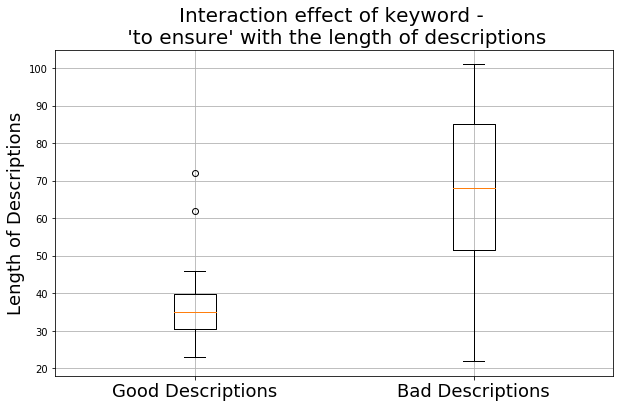

In [90]:
### Now we will try to find out the distribution of length of control descriptions which contain the word - 'to ensure'. (Both for good and Bad control Descriptions)
fig = plt.figure(figsize=(10,6))
n = []
for i in ['G','B']:
    a = []
    for index, row in data[data['GOOD or BAD'] == i].iterrows():
        x = row['Control Description']
        if 'to ensure' in x:
            a.append(row['len'])
        
    n.append(a)           
#print(n)
plt.title("Interaction effect of keyword - \n 'to ensure' with the length of descriptions",fontsize = 20)
plt.ylabel('Length of Descriptions',fontsize = 18)
plt.boxplot(n)
plt.xticks([1, 2], ['Good Descriptions','Bad Descriptions'],fontsize = 18)
plt.grid()
plt.show()

# The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging

# ADJ: adjective, e.g. big, old, green, incomprehensible, first
# ADP: adposition, e.g. in, to, during
# ADV: adverb, e.g. very, tomorrow, down, where, there
# AUX: auxiliary, e.g. is, has (done), will (do), should (do)
# CONJ: conjunction, e.g. and, or, but
# CCONJ: coordinating conjunction, e.g. and, or, but
# DET: determiner, e.g. a, an, the
# INTJ: interjection, e.g. psst, ouch, bravo, hello
# NOUN: noun, e.g. girl, cat, tree, air, beauty
# NUM: numeral, e.g. 1, 2017, one, seventy-seven, IV, MMXIV
# PART: particle, e.g. ’s, not,
# PRON: pronoun, e.g I, you, he, she, myself, themselves, somebody
# PROPN: proper noun, e.g. Mary, John, London, NATO, HBO
# PUNCT: punctuation, e.g. ., (, ), ?
# SCONJ: subordinating conjunction, e.g. if, while, that
# SYM: symbol, e.g. $, %, §, ©, +, −, ×, ÷, =, :), 😝
# VERB: verb, e.g. run, runs, running, eat, ate, eating
# X: other, e.g. sfpksdpsxmsa
# SPACE: space, e.g.
# VB  Verb, base form
# VBD Verb, past tense
# VBG Verb, gerund or present participle
# VBN Verb, past participle
# VBP Verb, non-3rd person singular present
# VBZ Verb, 3rd person singular present

In [ ]:
##### Now we will try to find out if a sentence is in active or passive voice

#### for every sentence:
#### find the role of every word
#### then find out noun/pronoun/common noun ----- actor
#### then find out the action/verb ---------------------action
#### then check if object is there - object can be - another noun/pronoun/common noun ------------- object of action
#### if these 3 entities appear in the sequence - actor----action-----object of action then it's in active voice.

In [6]:
doc = data['Control Description'].values[24]
print(doc)

Idea Intake and Prioritization prepared by business owner approved by CEO



In [7]:
text = nltk.word_tokenize(doc)

In [8]:
li_ = nltk.pos_tag(text)
li_

[('Idea', 'NNP'),
 ('Intake', 'NNP'),
 ('and', 'CC'),
 ('Prioritization', 'NNP'),
 ('prepared', 'VBN'),
 ('by', 'IN'),
 ('business', 'NN'),
 ('owner', 'NN'),
 ('approved', 'VBN'),
 ('by', 'IN'),
 ('CEO', 'NNP')]

In [9]:
[w[0] for w in li_ if w[1] == 'NNP']

['Idea', 'Intake', 'Prioritization', 'CEO']

In [10]:
just_tags = [w[1] for w in li_]
just_tags

['NNP', 'NNP', 'CC', 'NNP', 'VBN', 'IN', 'NN', 'NN', 'VBN', 'IN', 'NNP']

In [22]:
any(['NNP','NNP','CC','NNP','VBN'] == just_tags[i:i+5] for i in range(len(just_tags) - 1))

True

# passive if NNP---CC---NNP---VBN---CC---VBN----IN----NNP---CC---NNP 
# passive if 

In [12]:
passive_descriptions = []
for i in tqdm.tqdm(data['Control Description'].values,total = data.shape[0]):
    text = nltk.word_tokenize(i)
    li_ = []
    li_ = nltk.pos_tag(text)
    just_tags = [w[1] for w in li_]
    
    if any(['VBN','IN'] == just_tags[i:i+2] for i in range(len(just_tags) - 1)):
        passive_descriptions.append(i)    

100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 196.69it/s]


In [13]:
len(passive_descriptions)

37

In [14]:
passive_descriptions[0]

'The Compliance department monitors suspicious cash transactions and other suspicious activity reported by AmMetlife Business Units on a monthly basis to ensure suspicious activities / transactions are reported to regulatory authorities in a timely manner as appropriate.'

# Let's see how many verbs are in present or past tense for every control description

In [ ]:
# for every control description:
#     get the tag for every word
#     then pick the words (verbs) with tag as verb (in present or past tense)
#     then count the number of verbs in present tense and number of verbs in past tense

In [ ]:
Present_Verb_list = []
for i in tqdm.tqdm(data['Control Description'].values,total = data.shape[0]):
    text = nltk.word_tokenize(i)
    li_ = []
    li_ = nltk.pos_tag(text)
    Present_Verb_list.append([w[0] for w in li_ if w[1] == 'VB' or w[1] == 'VBG' or w[1] == 'VBP' or w[1] == 'VBZ'])
    
print(len(Present_Verb_list))

In [20]:
Past_Verb_list = []
for i in tqdm.tqdm(data['Control Description'].values,total = data.shape[0]):
    text = nltk.word_tokenize(i)
    li_ = []
    li_ = nltk.pos_tag(text)
    Past_Verb_list.append([w[0] for w in li_ if w[1] == 'VBD' or w[1] == 'VBN'])
    
print(len(Past_Verb_list))

100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 117.18it/s]


66


# Categorizing Verbs According to their tenses

In [21]:
data['No_Verbs_Present_Tense'] = [len(i) for i in Present_Verb_list]
data['No_Verbs_Past_Tense'] = [len(i) for i in Past_Verb_list]
data.head()

,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,What,Why,Additional Considerations 1,Additional Considerations 2,Additional Considerations 3,GOOD or BAD,len,filtered_descriptions,No_Verbs_Present_Tense,No_Verbs_Past_Tense
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,Yes,No,Insufficient Information,Too long,NaN,B,46,"[Management, reviews, local, product, developm...",2,0
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,40,"[monthly, basis, Manager, Compliance, review, ...",6,0
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,Yes,Yes,Good,NaN,NaN,G,43,"[Compliance, Department, assesses, reviews, cu...",5,0
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,Yes,No,Too Long,"Unclear Control frequency. i.e. ""As needed"", ""...",May be broken down into three controls,B,108,"[Compliance, Officer, communicates, AML, notif...",10,1
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,Yes,Yes,NaN,NaN,NaN,G,37,"[Compliance, department, monitors, suspicious,...",3,2


# Active and Passive Voice

In [41]:
active_voice = []
passive_voice = []
for i in data['Control Description'].values:
    text = re.sub('[(){}<>.,]','',i)
    text = nltk.word_tokenize(text)
    li_ = []
    li_ = nltk.pos_tag(text)
    just_tags = [w[1] for w in li_]
    
    if 'by' in text:
        
        possible_VBN = text[(text.index('by') - 1) % len(text)]
        
        a = [w[1] for w in li_ if w[0] == possible_VBN][0]
        
        if a == 'VBD' or a == 'VBN':
            
            passive_voice.append(i)
    
#     if 'VB' or 'VBZ' in just_tags:
#         active_voice.append(i)
  
    
    
print(len((passive_voice)))

15


In [42]:
passive_voice[0]

'The Compliance department monitors suspicious cash transactions and other suspicious activity reported by AmMetlife Business Units on a monthly basis to ensure suspicious activities / transactions are reported to regulatory authorities in a timely manner as appropriate.'

In [28]:
data['diff_len_&_median'] = data['len'].apply(lambda num : abs(num - 34))
data['ensur'] = [1 if 'ensur' in stem(i) else 0 for i in data['Control Description']]
data['review'] = [1 if 'review' in stem(i) else 0 for i in data['Control Description']]
data['control'] = [1 if 'control' in stem(i) else 0 for i in data['Control Description']]
data['assess'] = [1 if 'assess' in stem(i) else 0 for i in data['Control Description']]
data['approv'] = [1 if 'approv' in stem(i) else 0 for i in data['Control Description']]
data['Length'] = data['len']
data['Y'] = [1 if 'G' in i else 0 for i in data['GOOD or BAD']]

In [29]:
cd C:\Users\desh669\OneDrive - PNNL\Desktop\Metlife

C:\Users\desh669\OneDrive - PNNL\Desktop\Metlife


In [30]:
metlife_feedback = pd.read_csv('Word_Frequency_150_CY_Choices.csv')
keywords = [i for i in metlife_feedback.Word]
print(len(keywords))

36


In [31]:
stemmed_keywords = [stem(word) for word in keywords]
len(stemmed_keywords)

36

In [32]:
### Now we need to remove few keywords from this list since we have already added these words as a separate predictor
to_remove_keywords = ['ensur','review','control','assess','approv']

new_stemmed_keywords = [i for i in stemmed_keywords if i not in to_remove_keywords]
print(len(new_stemmed_keywords))

31


In [14]:
## This is not working
#[sum(1 for word in i for i in data['filtered_descriptions'] if stem(word) in new_stemmed_keywords)]

In [33]:
li_ = []
for i in data['filtered_descriptions']:
    count = 0
    for j in i:
        if stem(j) in new_stemmed_keywords:
            count += 1
    li_.append(count)
print(len(li_))

data['A_Words'] = li_

66


In [34]:
B=['prevent', 'mitigate','avoid', 'remediate', 'protect', 'reduce']
C = [stem(i) for i in B]
print(C)

['prevent', 'mitig', 'avoid', 'remedi', 'protect', 'reduc']


In [35]:
li_ = []
for i in data['filtered_descriptions']:
    count = 0
    for j in i:
        if stem(j) in C:
            count += 1
    li_.append(count)
print(len(li_))

data['B_words'] = li_

66


In [36]:
data.head()

,Control Resource ID,Control Title,Control Description,Control Scope,Control Frequency,Control Control Group,Control Automation,Control Active Status,Score,Who,...,diff_len_&_median,ensur,review,control,assess,approv,Length,Y,A_Words,B_words
0,C1007352,Policies & Procedures,Management reviews the local product developme...,Audit,As Needed,Policies & Procedures,Manual,Active,3,Yes,...,12,1,1,0,0,0,46,0,1,0
1,C1008374,"Suspicious Activity Monitoring, Investigation ...",On monthly basis Manager Compliance will revie...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,8,Yes,...,6,1,1,0,0,0,40,1,2,0
2,C1008376,Customer Identification Program (CIP),The Compliance Department assesses and reviews...,Audit,Quarterly,Approval & Authorization,Manual,Active,8,Yes,...,9,1,1,1,1,0,43,1,2,0
3,C1008380,Policies & Procedures Communications,The Compliance Officer communicates AML notifi...,Audit,Quarterly,Communication,Manual,Active,2,Yes,...,74,1,1,0,0,0,108,0,8,0
4,C1008381,Cash Transactions and Suspicious Activity Repo...,The Compliance department monitors suspicious ...,Audit,Monthly,"Oversight, Monitoring and Supervision",Manual,Active,7,Yes,...,3,1,0,0,0,0,37,1,3,0


In [43]:
data.columns

Index(['Control Resource ID', 'Control Title', 'Control Description',
       'Control Scope', 'Control Frequency', 'Control Control Group',
       'Control Automation', 'Control Active Status', 'Score', 'Who', 'What',
       'Why', 'Additional Considerations 1', 'Additional Considerations 2',
       'Additional Considerations 3', 'GOOD or BAD', 'len',
       'filtered_descriptions', 'Just_Verbs', 'diff_len_&_median', 'ensur',
       'review', 'control', 'assess', 'approv', 'Length', 'Y', 'A_Words',
       'B_words'],
      dtype='object')

# Implementing the model

In [45]:
import statsmodels.api as sm
logit_model=sm.Logit(data['Y'],data[['diff_len_&_median','ensur','review','control',
                                     'assess','approv','Length','A_Words','B_words']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.108385
         Iterations 12
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.840     
Dependent Variable:  Y                AIC:              32.3069   
Date:                2020-03-03 18:47 BIC:              52.0138   
No. Observations:    66               Log-Likelihood:   -7.1534   
Df Model:            8                LL-Null:          -44.651   
Df Residuals:        57               LLR p-value:      4.9450e-13
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      12.0000                                      
------------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------
diff_len_&_median -0.5228   0.2884 -1.8131 0.0698  -1.0880  0.0423
ensur             13.1118   7.3502  1.7839 0.0744  -

In [48]:
endog = data['Y']
exog = sm.add_constant(data[['diff_len_&_median','ensur','review','control','assess',
                             'approv','Length','A_Words','B_words']])

# Fit and summarize OLS model
mod = sm.Logit(endog, exog)
results = mod.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.107535
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                   66
Model:                          Logit   Df Residuals:                       56
Method:                           MLE   Df Model:                            9
Date:                Tue, 03 Mar 2020   Pseudo R-squ.:                  0.8410
Time:                        18:49:58   Log-Likelihood:                -7.0973
converged:                       True   LL-Null:                       -44.651
Covariance Type:            nonrobust   LLR p-value:                 1.505e-12
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9205      2.788     -0.330      0.741      -6.385       4.544
diff_le

In [38]:
### Now since we have got all the predictor variables we will try to set up a logistic regression model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['diff_len_&_median','ensur','review','control','assess','approv','Length','A_Words','B_words']],
                                                    data['Y'],test_size=0.30, random_state=101)

In [181]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
#result = logit_model.fit(method='bfgs')
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.003030
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.996     
Dependent Variable:   Y                 AIC:               18.2788   
Date:                 2020-02-29 17:48  BIC:               34.7366   
No. Observations:     46                Log-Likelihood:    -0.13940  
Df Model:             8                 LL-Null:           -31.186   
Df Residuals:         37                LLR p-value:       1.8084e-10
Converged:            0.0000            Scale:             1.0000    
---------------------------------------------------------------------
     Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------
X1   -5.0757   36128.0170 -0.0001 0.9999    -70814.6879    70804.5364
X2  202.3758 5510956.9750  0.0000 1.0000 -10801074.8156 10801479.5671
X3 -184.6392 5513852.7786 -0.0000 1.0000 -10807137.5014 10806768.2229
X4    3.7299 5616628.5129  0.0000 1.0000 -110083

In [178]:
X_train = X_train.reset_index(drop=True)